In [68]:
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az

In [4]:
ways = np.array([0, 3, 8, 9, 0])
ways / ways.sum()

array([0.  , 0.15, 0.4 , 0.45, 0.  ])

In [8]:
stats.binom.pmf(6, n=9, p=0.7)

0.2668279319999999

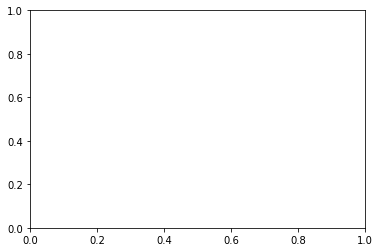

In [9]:
#fig, ax = plt.subplots(1, 1)

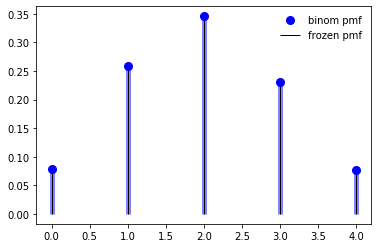

In [20]:
fig, ax = plt.subplots(1, 1)
n, p = 5, 0.4
mean, var, skew, kurt = stats.binom.stats(n, p, moments='mvsk')
x = np.arange(stats.binom.ppf(0.01, n, p),
               stats.binom.ppf(0.99, n, p))
ax.plot(x, stats.binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, stats.binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
rv = stats.binom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
         label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

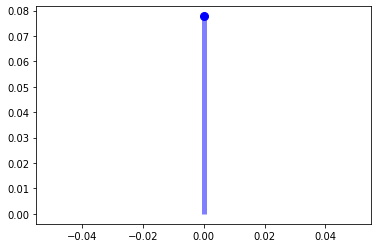

In [23]:

fig, ax = plt.subplots(1, 1)
n, p = 5, 0.4
mean, var, skew, kurt = stats.binom.stats(n, p, moments='mvsk')
x = np.arange(stats.binom.pmf(6, n=9, p=0.7))
ax.plot(x, stats.binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, stats.binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
#rv = stats.binom(n, p)
#ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
#         label='frozen pmf')
plt.show()

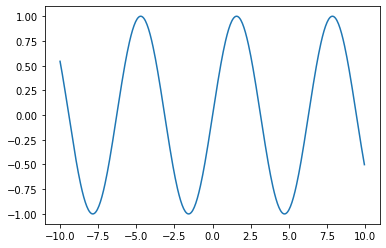

In [27]:
fig = plt.figure()
fig.subplots_adjust(top=0.8)
ax1 = fig.add_subplot(211)
ax1.set_ylabel('volts')
ax1.set_title('a sine wave')

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2 * np.pi * t)
line, = ax1.plot(t, s, lw=2)

# Fixing random state for reproducibility
np.random.seed(19680801)

ax2 = fig.add_axes([0.15, 0.1, 0.7, 0.3])
n, bins, patches = ax2.hist(np.random.randn(1000), 50)
ax2.set_xlabel('time (s)')

plt.show()
x = np.arange(-10, 10, 0.05);
y = np.sin(x)
plt.plot(x, y)

In [95]:
def posterior_grid_approx(grid_points = 200, success = 6, tosses = 9):
    """
    """
    #define grid
    p_grid = np.linspace(0, 1, grid_points)

    #define prior
    #prior = np.repeat(1, grid_points) #uniform prior
    prior = np.piecewise(p_grid, [p_grid <= 0.5, p_grid > 0.5], [0, 1]) #piecewise uniform prior
    #prior = np.exp(-5 * np.abs (p_grid - 0.5))
    
    #compute a likelihood at each grid value
    likelihood = stats.binom.pmf(success, tosses, p_grid)
    
    #compute product of likelihood and prior
    unstd_posterior = likelihood * prior
    
    #normalize posterior
    posterior = unstd_posterior/unstd_posterior.sum()
    
    return p_grid, posterior

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

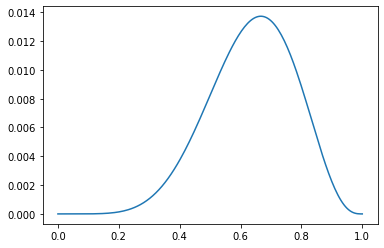

In [88]:
points = 200
W, N = 6, 9
x, y = posterior_grid_approx(points, W, N)

plt.plot(x,y)

In [75]:
data = np.repeat((0, 1), (3, 6))
data

array([0, 0, 0, 1, 1, 1, 1, 1, 1])

In [77]:
data = np.repeat((0, 1), (30, 60))
with pm.Model() as normal_aproximation:
    p = pm.Uniform('p', 0, 1)
    w = pm.Binomial('w', n=len(data), p=p, observed=data.sum())
    mean_q = pm.find_MAP()
    std_q = ((1/pm.find_hessian(mean_q, vars=[p]))**0.5)[0]
mean_q['p'], std_q

logp = -7.517, ||grad|| = 15: 100%|████████████████████████████████████████████████████| 7/7 [00:00<00:00, 3509.46it/s]


(array(0.66666667), array([0.0496904]))

In [78]:
norm = stats.norm(mean_q, std_q)
prob = .89
z = stats.norm.ppf([(1-prob)/2, (1+prob)/2])
pi = mean_q['p'] + std_q * z 
pi

array([0.58725181, 0.74608152])

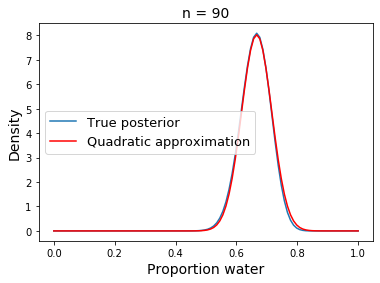

In [81]:
# analytical calculation
w, n = 60, 90
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x , w+1, n-w+1),
         label='True posterior')

# quadratic approximation
plt.plot(x, stats.norm.pdf(x, mean_q['p'], std_q),
         label='Quadratic approximation',
         color='Red')
plt.legend(loc=0, fontsize=13)

plt.title('n = {}'.format(n), fontsize=14)
plt.xlabel('Proportion water', fontsize=14)
plt.ylabel('Density', fontsize=14);

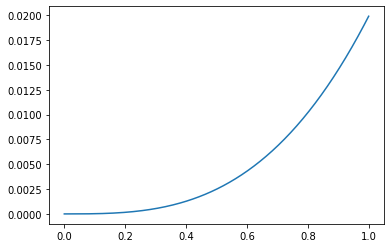

In [91]:
#Problem 2M1 (1)
points = 200
W, N = 3, 3
x, y = posterior_grid_approx(points, W, N)

plt.plot(x,y)

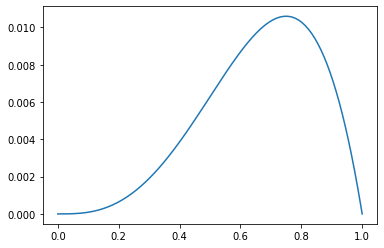

In [92]:
#Problem 2M1 (2)
points = 200
W, N = 3, 4
x, y = posterior_grid_approx(points, W, N)

plt.plot(x,y)

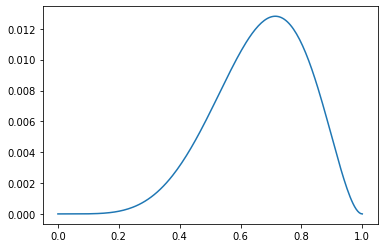

In [93]:
#Problem 2M1 (3)
points = 200
W, N = 5, 7
x, y = posterior_grid_approx(points, W, N)

plt.plot(x,y)

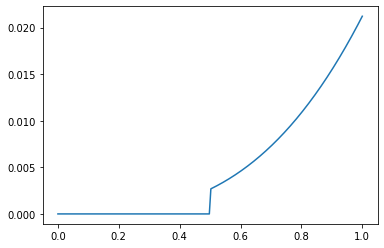

In [96]:
#Problem 2M2 (1)
points = 200
W, N = 3, 3
x, y = posterior_grid_approx(points, W, N)

plt.plot(x,y)

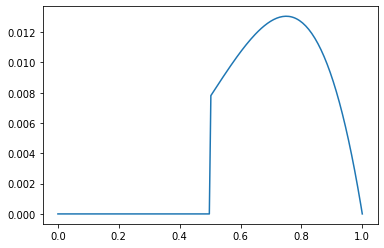

In [97]:
#Problem 2M2 (2)
points = 200
W, N = 3, 4
x, y = posterior_grid_approx(points, W, N)

plt.plot(x,y)

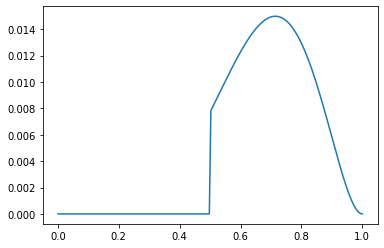

In [98]:
#Problem 2M2 (3)
points = 200
W, N = 5, 7
x, y = posterior_grid_approx(points, W, N)

plt.plot(x,y)

In [102]:
#Problem 2M3
pr_l_e = 0.3
pr_l_m = 1

ans = pr_l_e*0.5/0.65
ans

0.23076923076923075

In [ ]:
#Problem 2M4

#define cards as Bb, BW, Ww; different cases used to denote different sides of card

#observation is that up side is black

#Bb card can produce this result in 2 ways: Bb, bB
#BW card can produce this result in 1 way:  BW
#Ww card can produce this result in 0 ways

#wish is that underside is black

#Total number of ways to get observations = 3
#Number of ways to get wish given observations: 2

#--> p = 2/3

In [ ]:
#Problem 2M5

#define cards as B1b1, BW, Ww, B2b2; different cases used to denote different sides of card

#observation is that up side is black

#B1b1 card can produce this result in 2 ways: B1b1, b1B1
#BW card can produce this result in 1 way:  BW
#Ww card can produce this result in 0 ways
#B2b2 card can produce this result in 2 ways: B2b2, b2B2

#wish is that underside is black

#Total number of ways to get observations = 5
#Number of ways to get wish given observations: 4

#--> p(Bb) = 4/5

In [ ]:
#Problem 2M6

#define cards as Bb, BW, Ww; different cases used to denote different sides of card

#observation is that up side is black

#Bb card can produce this result in 2 ways: Bb, bB
#BW card can produce this result in 1 way:  BW
#Ww card can produce this result in 0 ways

#wish is that underside is black

#Bb has likelihood 1
#BW has likelihood 2
#Ww has likelihood 3

#new number of ways:
#Bb = 2 * 1 = 2
#BW = 1 * 2 = 2
#Ww = 0 * 3 = 0

#--> p(Bb) = 2/4 = 0.5

In [ ]:
#Problem 2M4

#define cards as Bb, BW, Ww; different cases used to denote different sides of card

#observation is that first card's up side is black and second card's up side is white
#if first card is Bb, there are 3 ways to get the second card to be white up (Ww, wW, WB)
#if first card is WW, data is impossible
#if first card is BW, there are 2 ways to get the second card to be white up (Ww, wW)

#it's twice as likely that the first card is Bb than BW because Bb has 2 chances to have a black side up and BW has 1 chance
#this is like the 'factory' count in the marbles example

#3*2 = 6
#2*1 = 2

#p = 6/(6+2) = 0.75

In [113]:
#define grid
p_grid = np.linspace(0, 1, 5)
p_grid
prior = np.array([0.5, 0.5])
prior
# #define prior
# #prior = np.repeat(1, grid_points) #uniform prior
# prior = np.piecewise(p_grid, [p_grid <= 0.5, p_grid > 0.5], [0, 1]) #piecewise uniform prior
# #prior = np.exp(-5 * np.abs (p_grid - 0.5))

# #compute a likelihood at each grid value
# likelihood = stats.binom.pmf(success, tosses, p_grid)

# #compute product of likelihood and prior
# unstd_posterior = likelihood * prior

# #normalize posterior
# posterior = unstd_posterior/unstd_posterior.sum()


array([0.5, 0.5])

In [121]:
#Problem 2H1

p_twins_a = 0.1
p_twins_b = 0.2

likelihood = np.array([p_twins_a, p_twins_b])
prior = np.array([1, 1])

unnorm_posterior = likelihood * prior
posterior = unnorm_posterior/unnorm_posterior.sum()


array([0.2, 0.8])

In [124]:
#Problem 2H2

#We want the probability that the panda is from A, given we observed twins:

#p(A|T) = (p(T|A)*p(A))/P(T)
#p(A|T) = (0.1*0.5)/(0.1*0.5 + 0.2*0.5) = 1/3

p_twins_a = 0.1
p_twins_b = 0.2

likelihood = np.array([p_twins_a, p_twins_b])
prior = np.array([1, 1])

unnorm_posterior = likelihood * prior
posterior = unnorm_posterior/unnorm_posterior.sum()
posterior[0]

0.3333333333333333

In [129]:
#Problem 2H3

#Prior = 1/3
# If A, 90% chance of offspring being singleton
# If B, 80%

# posterior = prior * likelihood

# posterior = (1/3) * (9/8) = 9/24 = 3/8  # this is wrong and I'm still not sure why. likelihood should be 27/25, not 27/24

p_twins_a = 0.1
p_twins_b = 0.2

likelihood = np.array([0.9, 0.8])
prior = np.array([1/3, 2/3])

unnorm_posterior = likelihood * prior
posterior = unnorm_posterior/unnorm_posterior.sum()
posterior[0]

0.36000000000000004

In [132]:
#Problem 2H4 - fresh start
# p(species A | passed test A) = p(passed test A | species A) * p(species A)/p(passed test A)
# p(species A | passed test A) = p(passed test A | species A) * p(species A)/0.5*(p(passed A | species B) + p(passed A | species A))
# p = (0.8 * 0.5)/0.5(0.8 + 0.35) = .8/1.15
# p =~ 0.696

p_a = 0.5
p_b = 0.5

prior = np.array([p_a, p_b])
likelihood = np.array([0.8, 0.35])
unnorm_posterior = likelihood * prior
posterior = unnorm_posterior/unnorm_posterior.sum()
posterior[0]

0.6956521739130436

In [133]:
#Problem 2H4 - using prior from 2H3
p_a = 0.36
p_b = 1 - 0.36

prior = np.array([p_a, p_b])
likelihood = np.array([0.8, 0.35])
unnorm_posterior = likelihood * prior
posterior = unnorm_posterior/unnorm_posterior.sum()
posterior[0]

0.5625